# Compare Linear Regression with Random Forest

## Libraries and settings

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error

## Import the flight delay data

In [2]:
# Read and select variables
df_orig = pd.read_csv("zrh_flightdelay.csv", sep=",", encoding='utf-8')

# Remove missing values
df = df_orig.dropna()
# Remove duplicates
df = df.drop_duplicates()

print(df.shape)
df.head(10)

(2165, 13)


,DESTINATION,IATA_CODE,AIRLINE,AIRCRAFT,DATETIME,DEPART_TIME,DEPART_DATETIME,DELAY_MINUTES,WEATHER,TEMP,DEST_CODE,AIRLINE_CODE,AIRCRAFT_CODE
0,Larnaca,LCA,Edelweiss Air,A320,2025-04-28 05:45:00,06:02,2025-04-28 06:02:00,17,5,5.4,90,35,3
1,Pristina,PRN,Chair Airlines,A319,2025-04-28 05:45:00,06:00,2025-04-28 06:00:00,15,5,5.4,140,27,2
2,Olbia,OLB,Edelweiss Air,A320,2025-04-28 06:25:00,06:45,2025-04-28 06:45:00,20,5,6.4,127,35,3
3,Pristina,PRN,Edelweiss Air,A359,2025-04-28 06:30:00,06:38,2025-04-28 06:38:00,8,5,6.4,140,35,8
4,Madrid,MAD,Helvetic Airways,E295,2025-04-28 06:55:00,07:13,2025-04-28 07:13:00,18,5,6.4,101,58,45
5,Belgrade,BEG,Swiss,BCS3,2025-04-28 06:55:00,07:14,2025-04-28 07:14:00,19,5,6.4,16,93,24
6,London,LCY,Swiss,BCS1,2025-04-28 06:55:00,07:34,2025-04-28 07:34:00,39,5,6.4,96,93,23
7,Palma de Mallorca,PMI,Swiss,A321,2025-04-28 06:50:00,07:11,2025-04-28 07:11:00,21,5,6.4,131,93,4
8,Brindisi,BDS,Swiss,A320,2025-04-28 06:50:00,07:17,2025-04-28 07:17:00,27,5,6.4,29,93,3
9,Hurghada,HRG,Chair Airlines,A320,2025-04-28 06:45:00,06:52,2025-04-28 06:52:00,7,5,6.4,75,27,3


## Train/Test splitting

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'WEATHER', 'TEMP']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [4]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.012693401332476761
Test score:  0.011439610836611713
Train RMSE:  18.11055088920663
Test RMSE:  20.117180728040516


In [5]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.8555493601964888
Test score:  0.010098680932172366
Train RMSE:  6.927322012214087
Test RMSE:  20.130820050401702


['TEMP' 'DEST_CODE' 'AIRLINE_CODE' 'AIRCRAFT_CODE' 'WEATHER']
[0.32254134 0.24909929 0.19717545 0.16348122 0.0677027 ]


<Axes: ylabel='features'>

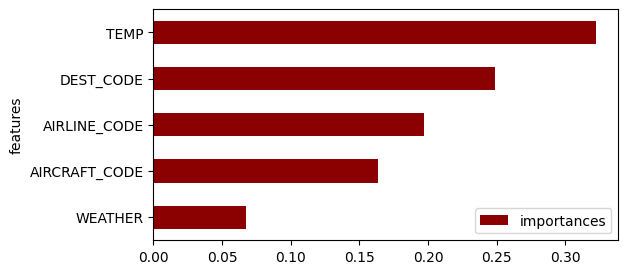

In [6]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [7]:
# make predictions
y_train_predict = random_forest_model.predict(X_train)
residuals = y_train - y_train_predict

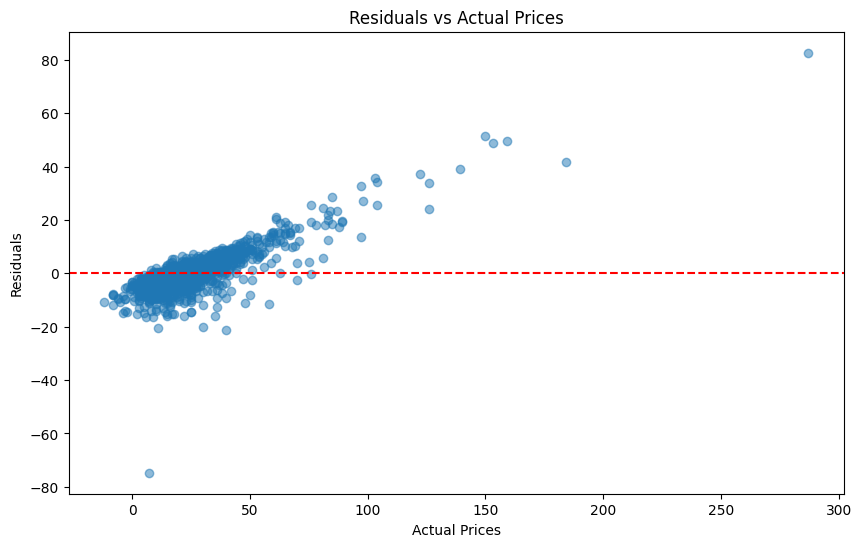

In [8]:
# Calculate residuals

plt.figure(figsize=(10, 6))
plt.scatter(y_train, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Prices')
plt.show()

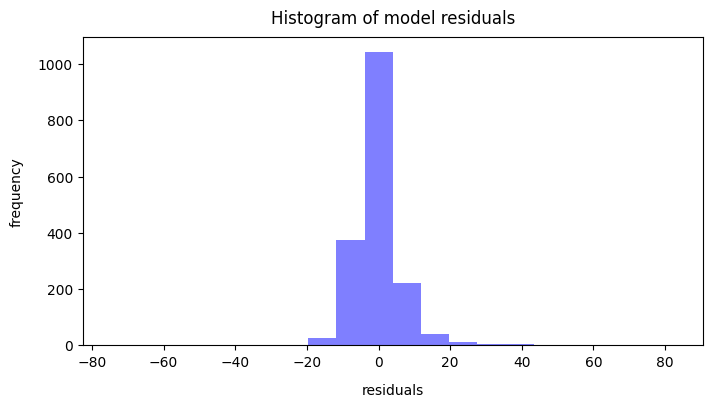

In [9]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

In [10]:
# Features (X) und Zielvariable (y) festlegen
X = df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'WEATHER', 'TEMP']]  # Ersetze "target" mit dem Namen der Zielspalte
y = df['DELAY_MINUTES']  # Ersetze "target" mit der tatsächlichen Zielspalte

In [11]:
# Trainiere das Modell (Verwendung von RandomForestRegressor für Preisvorhersage)
model = RandomForestRegressor(random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")

# Train on the full dataset
model.fit(X, y)
train_accuracy = model.score(X, y)
print(f"Training accuracy: {train_accuracy:.4f}")

Cross-validation accuracy: -0.1122
Training accuracy: 0.8561


In [12]:
# Gradio-Vorhersagefunktion
def predict(DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE, WEATHER, TEMP):
    input_data = [[DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE, WEATHER, TEMP]]
    prediction = model.predict(input_data)[0]
    return round(prediction)

In [15]:
predict(10, 88, 88, 2, 10)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


24